In [1]:
%matplotlib nbagg
import qcodes as qc
data = qc.DataSet('testsweep')
data

<IPython.core.display.Javascript object>

DataSet: DataMode.LOCAL, location='testsweep'
   amplitude: None
   chan0: None

<IPython.core.display.Javascript object>


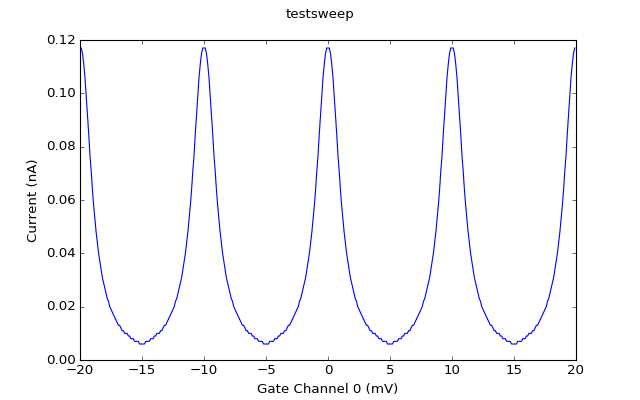

In [2]:
qc.MatPlot(data.amplitude)